# Ejercicio 4

En este ejercicio analizamos la asortatividad en diferentes redes. En la primer parte analizamos redes de colaboradores de publicaciones científicas y sistemas autónomos de internet. En la segunda parte estudiamos la asortatividad de las redes de proteinas:  Yeast-Y2H y Yeast-AP/MS

In [10]:
## Importacion de librerias ##
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pylab
import scipy.stats
from scipy import stats 

In [11]:
## Caracteristicas de los graficos ##

golden_mean = (math.sqrt(5)-1.0)/2.0       # Aesthetic ratio
fig_width = 7+3/8                       # width  in inches
fig_height = fig_width*golden_mean         # height in inches
fig_size =  [fig_width,fig_height]

params = {'backend': 'ps',
          'axes.titlesize': 18,
          'axes.labelsize': 19,
          'axes.linewidth': 0.5, 
          'axes.grid': False,
          'axes.labelweight': 'normal',  
          'font.family': 'serif',
          'font.size': 18.0,
          'font.weight': 'normal',
          'text.color': 'black',
          'xtick.labelsize': 18,
          'ytick.labelsize': 18,
          'text.usetex': True,
          'legend.fontsize': 18,
          'figure.dpi': 700,
          'figure.figsize': fig_size,
          'savefig.dpi': 700,
         }

pylab.rcParams.update(params)

Leemos los archivos de datos

In [12]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [13]:
G_colaboraciones=nx.read_gml('netscience.gml')

In [14]:
G_internet=ldata('as-22july06_edgelist.txt')

Creamos una función para conocer el máximo id de la red de internet.

In [15]:
def busco_max(G):
    m = 0
    i = 0
    l=len(G)
    while i<l:
        m1=int(G[i][0])
        m2=int(G[i][1])
        
        if(m1>m2 and m1>m):
            m=m1
        elif(m2>m1 and m2>m):
            m=m2

        i+=1
    
    return m

Calculamos el grado medio de los vecinos de cada uno de los nodos. Para eso, creamos la siguiente función:

In [16]:
def grado_vecinos_internet(G):
    
    i = 0
    maximo_id = busco_max(G)
    len_red = len(G)
    
    vector_grado_vecinos = np.zeros(maximo_id+1)
    vector_grado = np.zeros(maximo_id+1)
    grado_medio_vecinos = np.zeros(maximo_id+1)

    while i<len_red:
        indice_1 = int(G[i][0])
        indice_2 = int(G[i][1])
        vector_grado[indice_1] += 1
        vector_grado[indice_2] += 1

        i+=1

    i = 0
    while i<len_red:
        indice_1 = int(G[i][0])
        indice_2 = int(G[i][1])
        vector_grado_vecinos[indice_1] += vector_grado[indice_2]
        vector_grado_vecinos[indice_2] += vector_grado[indice_1]
        i+=1
    
    i = 0    
    while i<maximo_id:
        if(vector_grado[i]>0):
            grado_medio_vecinos[i] = vector_grado_vecinos[i] / float(vector_grado[i])
        i+=1            
        
    return (vector_grado,grado_medio_vecinos)
    

In [17]:
def grado_vecinos(G):
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    i=0
    cantidad_nodos = G.number_of_nodes()
    vector_grado_vecinos = np.zeros(cantidad_nodos)
    vector_grado = np.zeros(cantidad_nodos)
    grado_medio_vecinos = np.zeros(cantidad_nodos)

    while i<cantidad_nodos:
        j=i+1
        vecinos = list(G.degree)[i][1]
        if (vecinos>0):
            vector_grado[i] = vecinos
            vector_grado_vecinos[i] += vecinos
            while j<cantidad_nodos:
                if (A[i,j]==1):
                    vector_grado_vecinos[i] += list(G.degree)[j][1]
                    vector_grado_vecinos[j] += vecinos
                j+=1
        i+=1
        
    i=0
    
    while i<cantidad_nodos:
        if(vector_grado[i]>0):
            grado_medio_vecinos[i] = vector_grado_vecinos[i] / float(vector_grado[i])
        i+=1            
        
    return (vector_grado,grado_medio_vecinos)

In [18]:
resultados_G_colaboraciones=grado_vecinos(G_colaboraciones)

In [19]:
resultados_G_internet=grado_vecinos_internet(G_internet)

Creamos una función que hace un histograma en donde a cada grado (k) se le asocia el número medio de vecinos para dicho grado.

In [20]:
def knn_k(vector_grado,grado_medio_vecinos):
    i=0
    m = int(max(vector_grado))
    knn_tmp = np.zeros(m+1)
    vector_N = np.zeros(m+1)
    
    while i<len(vector_grado):
        indice = int(vector_grado[i])
        knn_tmp[indice]+=grado_medio_vecinos[i]
        vector_N[indice]+=1
        i+=1
    
    i = 0
    knn_k = []
    vector_k = []

    while i<m+1:
        if(vector_N[i]>0.0):
            knn_k+=[knn_tmp[i]/float(vector_N[i])]
            vector_k+=[i]
        i+=1
    resultado = [vector_k,knn_k]    
    return resultado       

In [21]:
histograma_colaboraciones=knn_k(resultados_G_colaboraciones[0],resultados_G_colaboraciones[1])
histograma_internet=knn_k(resultados_G_internet[0],resultados_G_internet[1])

Graficamos la relación entre el grado de un nodo y el grado medio de sus vecinos en escala lineal.

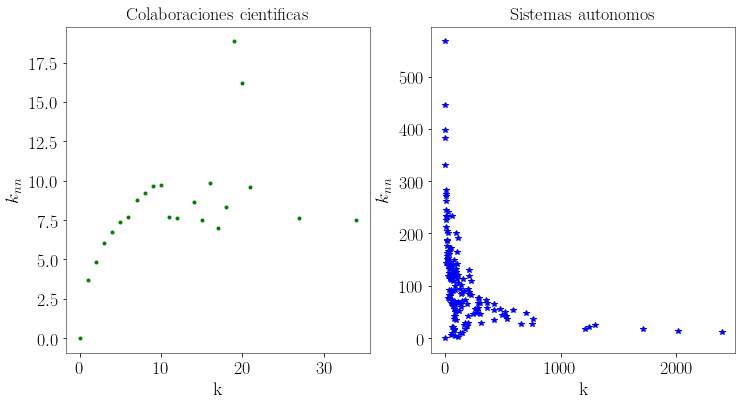

In [22]:
vector_k_colaboraciones=np.linspace(0,len(histograma_colaboraciones),len(histograma_colaboraciones))
vector_k_internet=np.linspace(0,len(histograma_internet),len(histograma_internet))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax[0].plot(histograma_colaboraciones[0], histograma_colaboraciones[1], 'g.')
ax[0].set_xlabel("k")
ax[0].set_ylabel("$k_{nn}$")
ax[0].title.set_text('Colaboraciones cientificas')

ax[1].plot(histograma_internet[0], histograma_internet[1], 'b*')
ax[1].set_ylabel("$k_{nn}$")
ax[1].set_xlabel("k")
ax[1].title.set_text('Sistemas autonomos')
plt.show()

Graficamos la relación entre el grado de un nodo y el grado medio de sus vecinos en escala logarítmica.

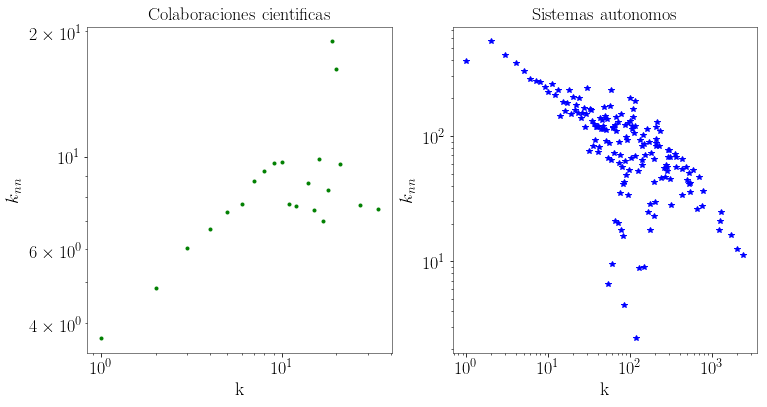

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax[0].plot(histograma_colaboraciones[0], histograma_colaboraciones[1], 'g.')
ax[0].set_xlabel("k")
ax[0].set_ylabel("$k_{nn}$")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].title.set_text('Colaboraciones cientificas')

ax[1].plot(histograma_internet[0], histograma_internet[1], 'b*')
ax[1].set_ylabel("$k_{nn}$")
ax[1].set_xlabel("k")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].title.set_text('Sistemas autonomos')
plt.show()

En los dos casos se puede observar que ambas función de correlación de grado poseen un comportamiento tipo "power law" ($k_{nn} \backsim k^{\mu}$). Sin embargo, la red de colaboraciones científicas es asortativa mientras que la red de sistemas autónomos de internet es disortativa [5]. 

Con el fin de caracterizar ambas redes, a continuación se realiza una regresión lineal de ambas curvas en la zona donde se observa un comportamiento lineal entre $\kappa$ y $k_{nn}$

In [24]:
kmax_colaboraciones = 11
xlog_colaboraciones = np.log10(histograma_colaboraciones[0][1:kmax_colaboraciones])
ylog_colaboraciones = np.log10(histograma_colaboraciones[1][1:kmax_colaboraciones])

kmax_internet = len(histograma_internet[0])
xlog_internet = np.log10(histograma_internet[0][10:kmax_internet])
ylog_internet = np.log10(histograma_internet[1][10:kmax_internet])

slope_colaboraciones, intercept_colaboraciones, r_value_colaboraciones, p_value, std_err = stats.linregress(xlog_colaboraciones, ylog_colaboraciones)
slope_internet, intercept_internet, r_value_internet, p_value, std_err = stats.linregress(xlog_internet, ylog_internet)

Graficamos los datos de cada red junto con los ajustes respectivos.

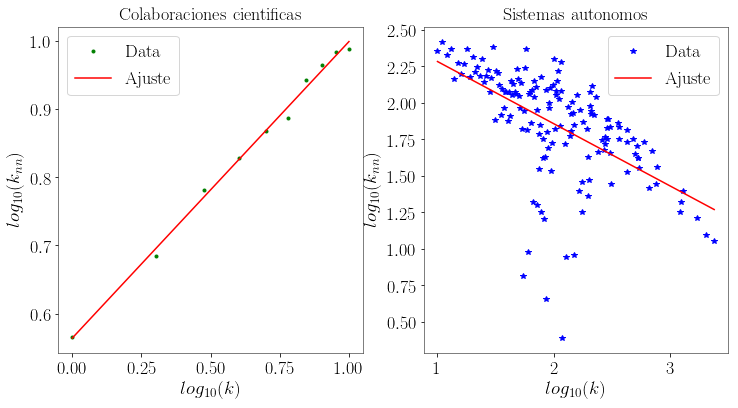

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax[0].plot(xlog_colaboraciones, ylog_colaboraciones, 'g.', label='Data')
ax[0].plot(xlog_colaboraciones, intercept_colaboraciones + slope_colaboraciones*xlog_colaboraciones, 'r', label='Ajuste')
ax[0].set_xlabel('$log_{10}(k)$')
ax[0].set_ylabel('$log_{10}(k_{nn})$')
ax[0].title.set_text('Colaboraciones cientificas')
ax[0].legend()

ax[1].plot(xlog_internet, ylog_internet, 'b*', label='Data')
ax[1].plot(xlog_internet, intercept_internet + slope_internet*xlog_internet, 'r', label='Ajuste')
ax[1].set_xlabel('$log_{10}(k)$')
ax[1].set_ylabel('$log_{10}(k_{nn})$')
ax[1].title.set_text('Sistemas autonomos')
ax[1].legend()
plt.show()

A simple vista (signo de las pendientes de las curvas) podemos determinar que la red de colaboraciones es asortativa, es decir, los nodos de alto grado se conectan con otros nodos de alto grado. 

In [26]:
print "Bondad del ajuste (colaboraciones) =",round(r_value_colaboraciones**2,3)
print "Exponente de la distribución (colaboraciones cientificas) =",round(slope_colaboraciones,3)

print "Bondad del ajuste (sistemas autonomos) =",round(r_value_internet**2,3)
print "Exponente de la distribución (sistemas autonomos) =",round(slope_internet,3)

Bondad del ajuste (colaboraciones) = 0.995
Exponente de la distribución (colaboraciones cientificas) = 0.435
Bondad del ajuste (sistemas autonomos) = 0.327
Exponente de la distribución (sistemas autonomos) = -0.426


Otra manera de medir la correlación de la red es utilizar el estimador de Newman [3,4]. A diferencia de la función de correlación de grado ($k_{nn} \backsim k^{\mu}$), el estimador de Newman asume un comportamiento $k_{nn} \backsim rk$, donde r se denomina coeficiente de correlación. 

A continuación se crean dos funciones auxiliares para calcular el estimador de Newman.

In [7]:
def S(G):
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    cantidad_nodos = G.number_of_nodes()
    i = 0
    S1 = 0
    S2 = 0
    S3 = 0
    while i<cantidad_nodos:
        value = list(G.degree)[i][1] 
        S1 += value
        S2 += value*value
        S3 += value*value*value   
        i+=1
    resultado=[S1,S2,S3]
    return resultado

In [8]:
def se(G):
    i=0
    se = 0.0
    while i< len(list(G.edges)):
        nombre_1 =  list(G.edges)[i][0]
        k_1 = G.degree()[nombre_1]
        nombre_2 =  list(G.edges)[i][1]
        k_2 = G.degree()[nombre_2]
        se+=k_1*k_2
        i+=1
    return 2*se

In [14]:
vector_S_colaboraciones = S(G_colaboraciones)
vector_S_colaboraciones += [se(G_colaboraciones)]

In [17]:
G_internet_n=nx.read_gml('as-22july06.gml')
vector_S_internet = S(G_internet_n)

In [ ]:
## Tarda demasiado tiempo!!
vector_S_internet += [se(G_internet_n)]

Ahora sí calculamos el estimador de Newman.

In [15]:
def r(vector_S):
    numerador = vector_S[0]*vector_S[3]-vector_S[1]**2
    denominador = vector_S[0]*vector_S[2]-vector_S[1]**2
    r = numerador/float(denominador)
    return r

In [16]:
r_colaboraciones=r(vector_S_colaboraciones)
#r_internet=r(vector_S_internet)
print 'Estimador de Newman (Red de colaboraciones) = ',r_colaboraciones 

Estimador de Newman (Red de colaboraciones) =  0.461622466753


## Redes biológicas
Ahora analizaremos las redes de proteinas: yeast Y2H y yeast AP/MS.  
Graficaremos la media del grado de vecinos correspondientes a grado $\kappa$ y calcularemos el exponente de correlación $\mu$ de cada una. 

### Yeast Y2H

In [81]:
##### Importamos la data yeast_Y2H #####
G_yeast_Y2H = nx.read_edgelist('yeast_Y2H.txt')

In [82]:
### Definimos todas las funciones a utilizar en esta parte ###
def grado_vecinos_yeast(G):
    A = nx.adjacency_matrix(G)  # Matriz de adycencia
    i=0
    vector_grado=[]
    grado_medio_vecinos=[]
    cantidad_nodos = G.number_of_nodes()
    while i<cantidad_nodos:
        j=0
        acumula_grado_vecinos = 0
        vecinos = list(G.degree)[i][1]
        if (vecinos>0):
            vector_grado += [vecinos]
            while j<cantidad_nodos:
                if (A[i,j]==1):
                    acumula_grado_vecinos +=list(G.degree)[j][1]
                j+=1
            grado_medio_vecinos+=[acumula_grado_vecinos/float(vecinos)]
        i+=1
    return (vector_grado,grado_medio_vecinos)

def remove_zeros(vector):
    x = []
    y = []
    i=0
    while i<len(vector):
        if vector[i]>0:
            x+=[i]
            y+=[vector[i]]
        i+=1
    result= [x,y]
    return result

def knn_k_yeast(vector_grado,grado_medio_vecinos):
    i=0
    knn_tmp = np.zeros(max(vector_grado)+1)
    vector_N = np.zeros(max(vector_grado)+1)
    
    while i<len(vector_grado):
        indice = vector_grado[i]
        knn_tmp[indice]+=grado_medio_vecinos[i]
        vector_N[indice]+=1
        i+=1
    
    i=0
    knn_k = np.zeros(max(vector_grado)+1)

    while i<len(knn_k):
        if(vector_N[i]>0.0):
            knn_k[i]=knn_tmp[i]/float(vector_N[i])
        else:
            knn_k[i]=0.0
        i+=1
    return(knn_k)    

In [83]:
## Procesamos los datos para obtener knn(k) ##
resultados_yeast_Y2H = grado_vecinos_yeast(G_yeast_Y2H)
knnk_yeast_Y2H = knn_k_yeast(resultados_yeast_Y2H[0],resultados_yeast_Y2H[1])

In [84]:
vector_k_Y2H = remove_zeros(knnk_yeast_Y2H)[0]
knnk_yeast_Y2H = remove_zeros(knnk_yeast_Y2H)[1]

In [85]:
## Logaritmizamos k y knn ##
xlog_Y2H = np.log(vector_k_Y2H[2:])
ylog_Y2H = np.log(knnk_yeast_Y2H[2:])
slope_Y2H, intercept_Y2H, r_value_Y2H, p_value_Y2H, std_err_Y2H = stats.linregress(xlog_Y2H, ylog_Y2H)
print "Exponente de correlacion:", slope_Y2H

Exponente de correlacion: -0.23715025643094714


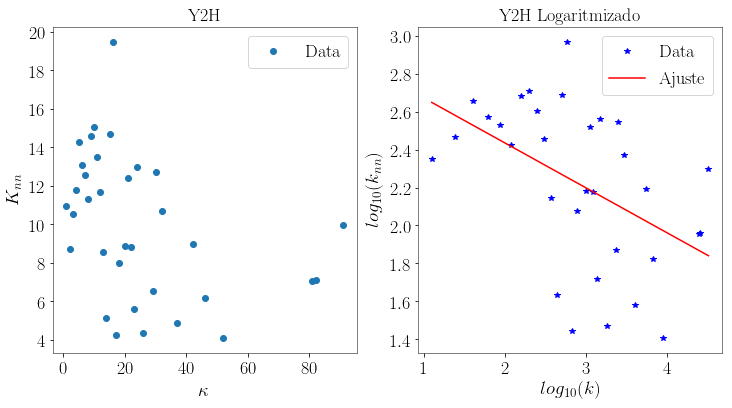

In [87]:
## Plots de Y2H ##
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax[0].plot(vector_k_Y2H,knnk_yeast_Y2H, 'o', label='Data')
ax[0].set_xlabel('$\kappa$ ')
ax[0].set_ylabel('$K_{nn}$')
ax[0].title.set_text('Y2H')
ax[0].legend()

ax[1].plot(xlog_Y2H, ylog_Y2H, 'b*', label='Data')
ax[1].plot(xlog_Y2H, intercept_Y2H + slope_Y2H*xlog_Y2H, 'r', label='Ajuste')
ax[1].set_xlabel('$log_{10}(k)$')
ax[1].set_ylabel('$log_{10}(k_{nn})$')
ax[1].title.set_text('Y2H Logaritmizado')
ax[1].legend()

plt.show()

Obtenemos un exponente de correlación negativo ($\mu$ = -0.23). A priori uno podría pensar que este resultado se debe al hecho de que las redes de proteínas tienden a ser disortativas por el simple hecho de ser redes biologicas$^{[1]}$. Más alla de esto, el comportamiento disortativo está además vinculado a la técnica Y2H que detecta interacciones binarias$^{[6]}$. 

Hay que destacar que la mayoría de las redes son disortativas en grado por ser grafos simples (grafos sin loops ni enlaces dobles). La excepción son las redes sociales (y unas pocas otras) que son asortativas gracias su estructura de grupos (forman pequenas comunidades que estan separadas del resto)$^{[1]}$.   

### Yeast AP/MS
Hacemos el mismo análisis para la red "yeast_AP-MS"

In [88]:
##### Importamos la data de yeast_AP-MS #####
G_yeast_APMS = nx.read_edgelist('yeast_AP-MS.txt')
resultados_yeast_APMS = grado_vecinos_yeast(G_yeast_APMS)
knnk_yeast_APMS = knn_k_yeast(resultados_yeast_APMS[0],resultados_yeast_APMS[1])

In [89]:
## Procesamos los datos para obtener knn(k) ##
vector_k_APMS = remove_zeros(knnk_yeast_APMS)[0]
knnk_yeast_APMS = remove_zeros(knnk_yeast_APMS)[1]

In [90]:
## Logaritmizamos k y knn ##
xlog_APMS = np.log(vector_k_APMS[2:])
ylog_APMS = np.log(knnk_yeast_APMS[2:])
slope_APMS, intercept_APMS, r_value_APMS, p_value_APMS, std_err_APMS = stats.linregress(xlog_APMS, ylog_APMS)
print "Exponente de correlacion:", slope_APMS

Exponente de correlacion: 0.6003091893290151


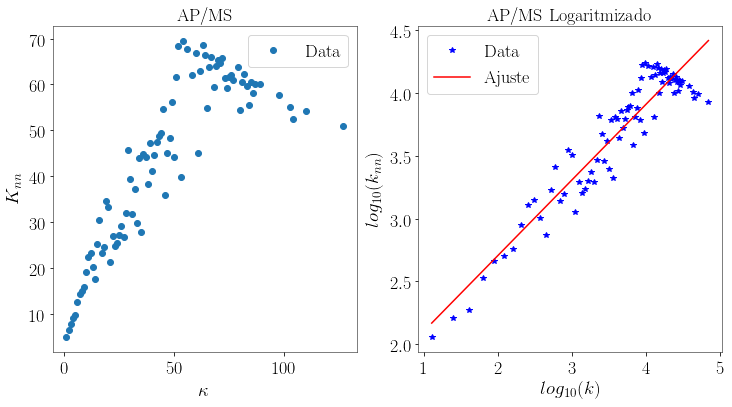

In [91]:
## Plots de AP/MS ##
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax[0].plot(vector_k_APMS,knnk_yeast_APMS, 'o', label='Data')
ax[0].set_xlabel('$\kappa$ ')
ax[0].set_ylabel('$K_{nn}$')
ax[0].title.set_text('AP/MS')
ax[0].legend()

ax[1].plot(xlog_APMS, ylog_APMS, 'b*', label='Data')
ax[1].plot(xlog_APMS, intercept_APMS + slope_APMS*xlog_APMS, 'r', label='Ajuste')
ax[1].set_xlabel('$log_{10}(k)$')
ax[1].set_ylabel('$log_{10}(k_{nn})$')
ax[1].title.set_text('AP/MS Logaritmizado')
ax[1].legend()

plt.show()


A diferencia de lo obtenido en la red anterior (yeast Y2M), en este caso obtenemos un comportamiento asortativo. Esto es algo llamativo, ya que las redes biológicas tienden a tener un comportamiento disortativo (los hubs tienden a juntarse con los nodos de grado bajo). 

La razón por la cual esta red poseé comportamiento asortativo tiene que ver con la técnica utilizada para determinar la red de interacción de proteinas. La técnica usada es "Affinity Purification followed by Mass Spectrometry" (AP/MS). Esta técnica purifica e identifica complejos de proteinas. A diferencia de la técnica " yeast two-hybrid" (Y2H) que detecta interacciones binarias.  

Los resultados de este trabajo están en concordancia con los resultados de Yu et al.[6]. Los autores de este paper obtienen un comportamiento ligeramente disortativo para Y2H y un comportamiento altamente asortativo para AP/MS. 

## Referencias

[1] A.-L. Barabási and R.Albert. Emergence of scaling in random networks. Science, 286:509-512, 1999. 

[2] M. Newman. Networks: An Introduction. Oxford University, Oxford, 2010.

[3] M. E. J. Newman. Assortative mixing in networks. Phys. Rev. Lett., 89: 208701, 2002.

[4] M. E. J. Newman. Mixing patterns in networks. Phys. Rev. E, 67: 026126, 2003.

[5] Rogier Noldus, Piet Van Mieghem; Assortativity in complex networks, Journal of Complex Networks, Volume 3, Issue 4, 1 December 2015, Pages 507–542, https://doi.org/10.1093/comnet/cnv005

[6] Yu, X., Ivanic, J., Wallqvist, A., & Reifman, J. (2009). A novel scoring approach for protein co-purification data reveals high interaction specificity. PLoS computational biology, 5(9), e1000515.